<a href="https://colab.research.google.com/github/TruongHieuDEV/MachineLearning/blob/main/PerceptronLearningAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11lVjIsE32svOaD91KIHoVYYqOckRZMOU' -O data_train.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ng1TyqEF8NXQvhl3hO2j3Prek_dD5VS_' -O data_test.csv

Những bài toán classification là những bài toán phân loại, nó sẽ chia thành một số class dựa trên các đặc trưng của bộ dữ liệu. Cơ bản nhất của dạng này là bài toán binary classification. Perceptron là một thuật toán Classification cho trường hợp đơn giản nhất.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Thuật toán này sẽ đi tìm một đường biên phân chia các điểm dữ liễu thành 2 class, sao cho mỗi điểm nằm đúng trong class của nó. Giả sự ta tìm được một đường thẳng trong không gian hai chiều hoặc mặt phẳng trong không gian 3 chiều hay siêu mặt phẳng... Có phương trình là:

>  $f(x) = w_0 * x_0 + w_1 * x_1 + ... + w_n * x_n = 0$

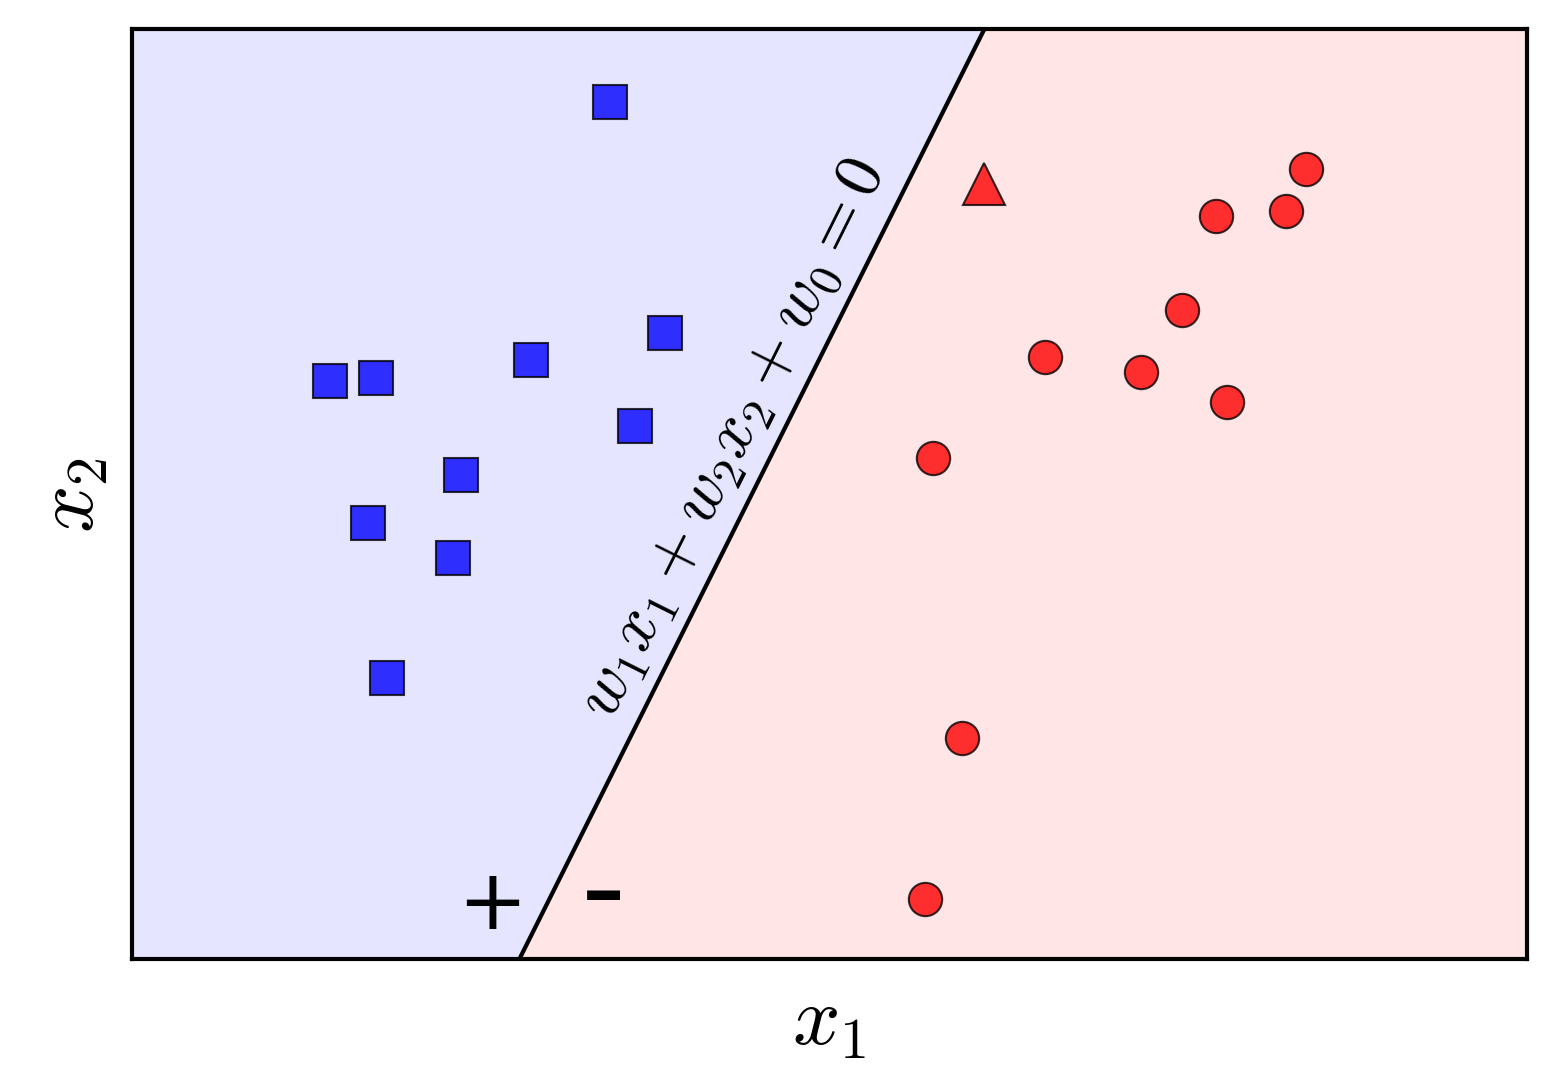


Các điểm nằm về cùng 1 phía so với đường thẳng sẽ mang cùng dấu. Chỉ cần đổi dấu của w chúng ta có thể giả sử các điểm màu xanh mang dấu + và các điểm màu đỏ mang dấu -. Với $w$ là nghiệm của bài toán ta có thể tính được class của điểm dữ liệu $x$:


> $label(x) = 1$ if **$w^T*x$** $\geq 0$, otherwise $-1$



Với một giá trị $w$ chưa phải nghiệm chúng ta sẽ có những điểm dữ liệu cho ra giá trị dự đoán khác với giá trị mục tiêu, hàm mất mát trong trường hợp này đơn giản là đi đếm số điểm dữ liễu như vậy đối với mỗi $w$ tìm được. Ta có công thức:


> $J_1(w) = ∑_{x_i} (-y_isgn$(**$w^Tx_i$**)$)$



Vì các điểm $x$ trên công thức là các điểm thuộc tập misclassified(thay đổi theo w). Vì vậy giá trị $-y_i$ và $sgn(w^Tx_i))$ luôn cùng dấu và cho kết quả bằng 1. Vì vậy hàm này sẽ đếm được số điểm bị misclassified. Nhưng vấn đề là chúng ta 

In [ ]:
iris = load_iris()
X = iris.data[:, :2].T
y =  [1 if i == 0 else -1 for i in iris.target]
print(y)

In [ ]:
colors = { -1 : 'deepskyblue', 1 : 'orangered'}
plt.scatter(X[0], X[1], c=[colors[s] for s in y])

In [ ]:
X_test = X.T
y_test = y

In [ ]:
Xbar = np.concatenate((X_test.T, np.ones((1, X_test.T.shape[1]))), axis=0)
Xbar

In [ ]:
def h(w, x):
  return np.sign(np.dot(w.T, x))

In [ ]:
def _has_Converged(X, y, w):
  return np.array_equal(h(w, X), y)

In [ ]:
def _count_Miscl (X, y, w):
  return np.sum(h(w, X) != y)

In [ ]:
def _perceptron_Learning_Algorithm(Xbar, y, w_init):
  w = [w_init]
  N = Xbar.shape[1]
  misclassified = []
  cnt = 0
  cnt_mis_fl_w = []
  while cnt < 100000:
    per_id = np.random.permutation(N)
    for i in range(N):
      H = h(w[-1], Xbar[ :, per_id[i]])
      if H != y[per_id[i]]:
        w_new = w[-1] + y[per_id[i]] * Xbar[ : ,per_id[i]]
        if (_count_Miscl(Xbar, y, w_new) < _count_Miscl(Xbar, y, w[-1])):
          w.append(w_new)
        misclassified.append(per_id[i])
    if (_has_Converged(Xbar, y, w[-1])):
      break
    cnt += 1
  return w, misclassified
d = Xbar.shape[0] 
w_init = np.random.randn(1, d)
w, mis = _perceptron_Learning_Algorithm(Xbar, y_test, w_init[-1])

In [ ]:
def _draw_Line(i):
  w1, w2, w3 = w[i]
  x_min = np.min(Xbar[0]) * 0.95
  x_max = np.max(Xbar[0]) * 1.05
  
  if (w2 != 0):
    return plt.plot([x_min, x_max], [-(x_min * w1 + w3)/w2, -(x_max * w1 + w3) / w2], '-')
  else:
    x10 = -w3/w1
    return plt.plot([x10, x10], [-100, 100], 'k')


In [ ]:
_draw_Line(-1)
colors = { -1 : 'deepskyblue', 1 : 'orangered'}
plt.scatter(X[0], X[1], c=[colors[s] for s in y])



> Công thức sigmoid:\
  $f(s) = \frac{1}{1 + e^{-s}}$\
  $\lim_{x \to -\infty}\sigma(s) = 0$; $\lim_{x \to \infty}\sigma(s) = 1$\
  $\sigma(s)^{'} = \frac{e^{-s}}{(1 + e^{-s})^2} = \sigma(s) * (1 - \sigma(s))$


> Công thức tanh(s):\
  $tanh(s) = \frac{e^{s} - e^{-s}}{e^{s} + e^{-s}}$



